In [34]:
import tweepy
from tweepy import OAuthHandler
from tweepy import API

import os
import csv
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import imageio

import nltk
from nltk.corpus import stopwords

# import sys
# which Python it's running in     sys.executable
# where it's looking for imports   sys.path 

In [23]:
# Store OAuth authentication credentials in relevant variables
access_token = "YourToken"
access_token_secret = "YourTokenSecret"
consumer_key = "YourKey"
consumer_secret = "YourSecret"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

# Set up the API with the authentication handler
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify= True)

## Search & save tweets

In [24]:
tweetsjs = [] 

for tweet in tweepy.Cursor(api.search, q=('#Liepaja OR #Liepāja OR Liepaja OR Liepāja -filter:retweets'), tweet_mode='extended').items(100000):
    tweetsjs.append(tweet._json)
    
df_tweetsjs = pd.DataFrame(tweetsjs)

W = pd.ExcelWriter('tweetsjs_Liepaja Oct18.xlsx')
df_tweetsjs.to_excel(W)
W.save()

len(tweetsjs)

385

## Trending tweets in geo location

In [25]:
Latvia_WOE_ID = 23424874
# Where-On-Earth
# looked up from the Creative commons licenced https://archive.org/search.php?query=geoplanet

trends = api.trends_place(Latvia_WOE_ID)
 
trends = json.loads(json.dumps(trends, indent=1))
 
for trend in trends[0]["trends"]:
    print (trend["name"])
    
    # print (trend["tweet_volume"])  # As per Twitter documentation, only prints volume if available

#MakeItRight
saeimas
Manuprāt
valkas
Kaut
Spānijas
Labāk
Jelgavā
kremļa
polijas
#dienasbizness
latvijai
valsts
Labdien
Krievijā
brexit
PSRS
nezinu
Barona
rīga
tātad
sveiks
esmu
Tramps
Latvian
ukrainas
#teirdarbs
#ESfondi
Viņi
mūsu
iespējams
Vācijas
#прибалтика


## All tweets in Liepaja

In [26]:
tweets = []

for tweet in tweepy.Cursor(api.search, q=('-filter:retweets'), geocode='56.511976,21.014182,5km', lang="lv OR en", tweet_mode='extended').items(100000):
    tweets.append(tweet)
    
len(tweets)

697

In [27]:
## The Entities column has Hashtags among many other things, 
## for example {'hashtags': [{'text': 'liepāja', 'indices': [129, 137]}], 'symbols': [], 'user_mentions': [], 'urls': []}

Ht_df = pd.DataFrame()
j = 0

for tweet in range(0,len(tweets)):
    hashtag = tweets[tweet].entities.get('hashtags')
    for i in range(0,len(hashtag)):
        Ht = hashtag[i]['text'] 
        Ht_df.at[j,'Hashtag'] = Ht
        j = j+1

In [28]:
print(Ht_df.values[0:5])

[['kiaardala']
 ['xceed']
 ['brandnewkia']
 ['liepāja']
 ['teamfēnikss']]


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thesk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# coding: utf8
from __future__ import unicode_literals

# Source: https://github.com/stopwords-iso/stopwords-lv

Latvian_stop_words = set(
    """
aiz
ap
apakš
apakšpus
ar
arī
augšpus
bet
bez
bija
biji
biju
bijām
bijāt
būs
būsi
būsiet
būsim
būt
būšu
caur
diemžēl
diezin
droši
dēļ
esam
esat
esi
esmu
gan
gar
iekam
iekams
iekām
iekāms
iekš
iekšpus
ik
ir
it
itin
iz
ja
jau
jeb
jebšu
jel
jo
jā
ka
kamēr
kaut
kolīdz
kopš
kā
kļuva
kļuvi
kļuvu
kļuvām
kļuvāt
kļūs
kļūsi
kļūsiet
kļūsim
kļūst
kļūstam
kļūstat
kļūsti
kļūstu
kļūt
kļūšu
labad
lai
lejpus
līdz
līdzko
ne
nebūt
nedz
nekā
nevis
nezin
no
nu
nē
otrpus
pa
par
pat
pie
pirms
pret
priekš
pār
pēc
starp
tad
tak
tapi
taps
tapsi
tapsiet
tapsim
tapt
tapāt
tapšu
taču
te
tiec
tiek
tiekam
tiekat
tieku
tik
tika
tikai
tiki
tikko
tiklab
tiklīdz
tiks
tiksiet
tiksim
tikt
tiku
tikvien
tikām
tikāt
tikšu
tomēr
topat
turpretim
turpretī
tā
tādēļ
tālab
tāpēc
un
uz
vai
var
varat
varēja
varēji
varēju
varējām
varējāt
varēs
varēsi
varēsiet
varēsim
varēt
varēšu
vien
virs
virspus
vis
viņpus
zem
ārpus
šaipus
""".split()
)

In [31]:
STOPWORDS = nltk.corpus.stopwords.words('english')
STOPWORDS.extend(Latvian_stop_words)

In [32]:
Ht_string = " ".join(Ht_df['Hashtag'])  ##.values.astype(str))
print(Ht_string[1:100])

iaardala xceed brandnewkia liepāja teamfēnikss teamolimpiks Liepāja izlase vaiarīne Latvijā LaiksPa


(-0.5, 999.5, 807.5, -0.5)

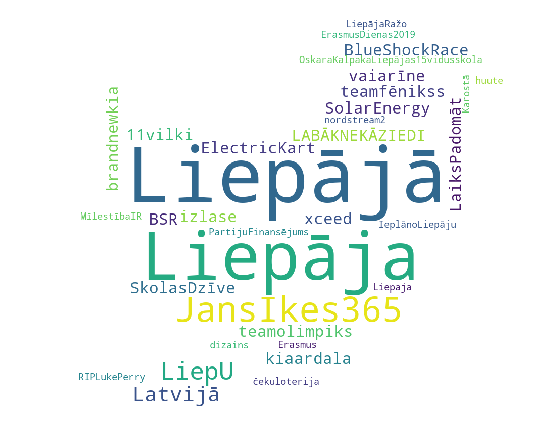

In [39]:
Tweet_mask = imageio.imread("C:\\Users\\thesk\\Desktop\\twitter_mask.png")

wc = WordCloud(background_color="white", stopwords=STOPWORDS, mask = Tweet_mask)
wc.generate(Ht_string)
plt.figure(figsize=(15,7.5))
plt.imshow(wc)
plt.axis("off")